# Module 3 Assignment, Part 2

## Section 0: Setup & initialization

### Setting up your environment  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import numpy as np
from scipy import stats
import seaborn as sns

###  Loading the data

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [12]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/Module 3')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('diabetes_data_m3.csv')
df.index = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)
df.index.names = ['DF Index']

In [4]:
df.tail(10)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
DF Index,,,,,,,,,,,,,,,,,,,,,
13006,185391,80,63.000000,25.397909,0,2,1,172.7,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13007,258471,79,42.000000,59.634077,1,5,1,145.3,8,2,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13008,211855,76,71.000000,32.665762,0,3,0,149.9,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13009,239541,39,73.000000,36.898688,0,2,0,175.3,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13010,257653,50,62.021899,23.773784,0,2,0,157.0,15,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13011,169374,52,53.000000,29.677752,0,5,1,175.3,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13012,178310,7,56.000000,17.159278,0,2,1,167.6,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13013,149054,116,83.000000,28.507115,0,3,0,154.9,3,0,...,242.389041,232.699125,0,0,0,0,0,0,0,1
13014,182181,172,89.000000,27.840282,1,5,0,154.9,15,2,...,242.389041,232.699125,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(13016, 180)

##Section 1: Naive Bayes

### 1\. Split the diabetes dataset into a training and test sets

In [13]:
from sklearn.model_selection import train_test_split

train = df[[i for i in list(df.columns) if i != 'diabetes_mellitus']]
x_train, x_test, y_train, y_test = train_test_split(train, df["diabetes_mellitus"], test_size = 0.25 , random_state = 100)
x_train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
DF Index,,,,,,,,,,,,,,,,,,,,,
9826,266962,118,60.0,58.203125,0,2,0,160.0,8,2,...,120.000000,120.000000,120.000000,0,0,1,0,0,0,0
9189,263402,112,70.0,33.164062,0,2,0,160.0,3,0,...,142.117968,242.389041,232.699125,0,0,0,0,0,0,0
5378,147900,11,59.0,30.693878,1,2,1,175.0,13,2,...,142.117968,242.389041,232.699125,0,0,0,0,0,0,0
11920,259511,21,59.0,38.320312,0,0,0,160.0,14,1,...,142.117968,242.389041,232.699125,0,0,0,0,0,0,0
10249,273114,33,73.0,29.139754,0,2,0,147.3,3,0,...,142.117968,242.389041,232.699125,0,0,0,0,0,0,0


### 2\. Train a Naive Bayes classifier on the diabetes data 

In [14]:
#https://medium.com/@pragya_paudyal/classification-of-diabetes-using-naive-bayes-in-python-44385b279277

from sklearn.naive_bayes import GaussianNB

#Create a Gausssian Calassifier 
model = GaussianNB()

#Train the model using the the training sets
model.fit(x_train, y_train)

#Predict the response for the test datasets
test_predict = model.fit(x_train, y_train).predict(x_test)


### 3\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [15]:
from sklearn import metrics
test_prediction = model.predict(x_test)

print(metrics.classification_report(y_test, test_prediction))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2511
           1       0.51      0.44      0.47       743

    accuracy                           0.78      3254
   macro avg       0.68      0.66      0.67      3254
weighted avg       0.77      0.78      0.77      3254



### 4\. Show the confusion matrix heatmap for the predictions

[[2198  313]
 [ 415  328]]


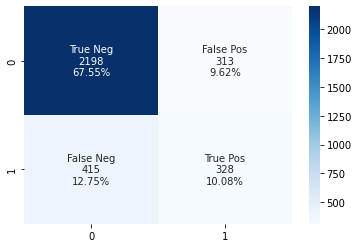

In [16]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

print(metrics.confusion_matrix(y_test, test_prediction))
cf_matrix = metrics.confusion_matrix(y_test, test_prediction)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Section 2: Decision Tree

### 1\.  Train a Decision Tree Classifier on the diabetes data

In [22]:
from sklearn.tree import DecisionTreeClassifier

#create a decision tree classifier object
model = DecisionTreeClassifier()

#train the decision tree classifier
tree_clf = model.fit(x_train, y_train)

#predict the response
tree_predict = tree_clf.predict(x_test)

### 2\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [23]:
from sklearn import metrics

tree_prediction = model.predict(x_test)
print(metrics.classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2511
           1       0.41      0.41      0.41       743

    accuracy                           0.73      3254
   macro avg       0.62      0.62      0.62      3254
weighted avg       0.73      0.73      0.73      3254



### 3\. Show the confusion matrix heatmap for the predictions

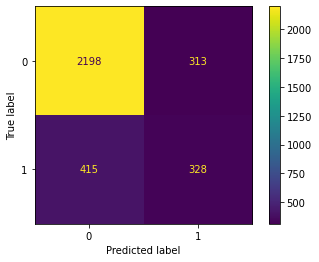

In [24]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = (confusion_matrix(y_test, test_predict))
disp = ConfusionMatrixDisplay(cm)
disp.plot()


### 4\. Visualize the decision tree as a [tree diagram](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

[Text(0.5088992322856322, 0.9827586206896551, 'X[106] <= 189.5\ngini = 0.339\nsamples = 9762\nvalue = [7650, 2112]'),
 Text(0.27403287058299025, 0.9482758620689655, 'X[106] <= 146.5\ngini = 0.207\nsamples = 7098\nvalue = [6267, 831]'),
 Text(0.1351442544630028, 0.9137931034482759, 'X[105] <= 1.355\ngini = 0.143\nsamples = 4364\nvalue = [4026, 338]'),
 Text(0.0747499674355896, 0.8793103448275862, 'X[106] <= 124.5\ngini = 0.101\nsamples = 3294\nvalue = [3118, 176]'),
 Text(0.05609043438909166, 0.8448275862068966, 'X[29] <= 41.5\ngini = 0.063\nsamples = 2122\nvalue = [2053, 69]'),
 Text(0.05094785934323291, 0.8103448275862069, 'X[118] <= 146.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.049572768364313166, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05232295032215266, 0.7758620689655172, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06123300943495041, 0.8103448275862069, 'X[156] <= 87.7\ngini = 0.06\nsamples = 2118\nvalue = [2052, 66]'),
 Text(0

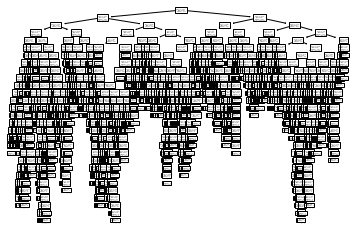

In [25]:
from sklearn import tree
tree.plot_tree(tree_clf)

### 5\. Visualize the decision tree as a text based diagram

In [26]:
from sklearn.tree import export_text

trainColumns = df.columns.drop('diabetes_mellitus') # drop the last col
r = export_text(tree_clf)
print(r)

|--- feature_106 <= 189.50
|   |--- feature_106 <= 146.50
|   |   |--- feature_105 <= 1.36
|   |   |   |--- feature_106 <= 124.50
|   |   |   |   |--- feature_29 <= 41.50
|   |   |   |   |   |--- feature_118 <= 146.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_118 >  146.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_29 >  41.50
|   |   |   |   |   |--- feature_156 <= 87.70
|   |   |   |   |   |   |--- feature_67 <= 135.50
|   |   |   |   |   |   |   |--- feature_62 <= 204.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 29.24
|   |   |   |   |   |   |   |   |   |--- feature_114 <= 6.51
|   |   |   |   |   |   |   |   |   |   |--- feature_116 <= 5.80
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_116 >  5.80
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_114 >  6.51
|   | 

### 6\.  Show the feature importances computed by the classifier

In [27]:
importance = tree_clf.feature_importances_
print(importance)

[0.0135688  0.00912553 0.01606537 0.03030307 0.         0.00561063
 0.         0.00620124 0.00363028 0.00163027 0.01550692 0.
 0.00526189 0.01269254 0.         0.01457182 0.00264723 0.00713983
 0.00774321 0.         0.00112401 0.00385346 0.00179696 0.00951479
 0.00055813 0.00367614 0.0004028  0.         0.         0.01626287
 0.01004215 0.00092841 0.         0.00386484 0.         0.
 0.00495965 0.00112968 0.00658353 0.00431612 0.00888549 0.00902586
 0.00247131 0.00454113 0.00429151 0.00609319 0.00389722 0.00737325
 0.00195072 0.00413359 0.01151404 0.00727807 0.00540347 0.00187764
 0.00395699 0.00423344 0.00714423 0.00463972 0.00438378 0.01505618
 0.0003021  0.01467399 0.00228849 0.00437922 0.00663877 0.00703737
 0.00148653 0.00187529 0.00590235 0.00640269 0.00376242 0.
 0.00118589 0.0040135  0.003799   0.00491538 0.00363129 0.01004353
 0.00062889 0.         0.00421878 0.00247247 0.00391395 0.00817505
 0.00744939 0.0122717  0.00658065 0.00626821 0.00319525 0.0068139
 0.00581436 0.002496

### 7\. Create a bar chart of the feature importances with importance level on the x-axis, and the features on the y-axis

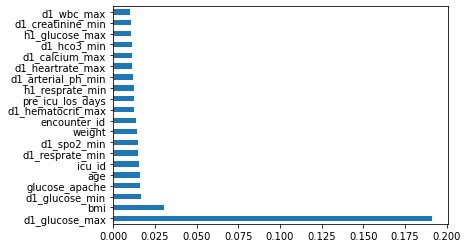

In [28]:
feat_importances = pd.Series(importance, index = x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Section 3: Random Forest Classifier

### 1\.  Train a Random Forest Classifier on the diabetes data

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state= 42)
clf = clf.fit(x_train, y_train)


### 2\. Use your classifier on your test data & show a [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [36]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2511
           1       0.51      0.44      0.47       743

    accuracy                           0.78      3254
   macro avg       0.68      0.66      0.67      3254
weighted avg       0.77      0.78      0.77      3254



### 3\. Show the confusion matrix heatmap for the predictions

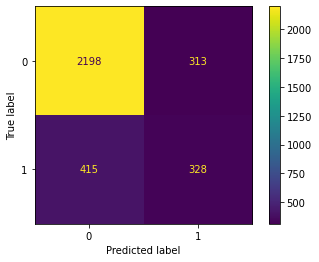

In [37]:
 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = (confusion_matrix(y_test, test_predict))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Run the following cells to visualize the Random Forest

In [43]:
from sklearn.tree import export_graphviz
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Export as dot file
estimator = clf.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_train.columns,
                class_names = str(y.unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [39]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

2

In [44]:
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: ignored

### 4\. Print out the [feature_importances_](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) computed by the classifier

In [45]:
importance = clf.feature_importances_
print(importance)

[9.23257591e-03 7.94359336e-03 1.25563344e-02 1.95779986e-02
 5.38107445e-04 2.77584425e-03 1.22128252e-03 6.63474163e-03
 3.65481748e-03 1.93600747e-03 8.92320391e-03 4.90364577e-04
 3.28711516e-03 8.62615776e-03 0.00000000e+00 1.62985604e-02
 3.88254553e-03 7.48343833e-03 7.29383582e-03 4.63059584e-04
 2.57994211e-03 3.73301171e-03 7.51384996e-03 8.58816649e-03
 2.09001721e-03 2.26238188e-03 2.07222015e-03 3.37445986e-04
 2.53640076e-03 6.38822093e-02 7.99135699e-03 6.28083035e-03
 8.34845311e-04 6.15554494e-03 2.48109149e-03 2.37163292e-03
 2.54961769e-03 2.65590972e-03 6.48994351e-03 5.55521299e-03
 6.64761553e-03 6.01142500e-03 2.02256960e-03 8.13480422e-03
 3.58512231e-03 2.83711678e-03 7.00468900e-03 6.64852079e-03
 7.22089070e-03 6.52872169e-03 9.35622349e-03 8.08793286e-03
 3.40128290e-03 2.94818997e-03 6.84711723e-03 6.12776229e-03
 6.46980235e-03 6.99834354e-03 7.10032740e-03 5.78562279e-03
 2.64601899e-03 6.53215548e-03 4.59331133e-03 4.33369701e-03
 7.59331540e-03 7.980103

### 5\. Create a bar chart of the feature importances with importance level on the x-axis, and the features on the y-axis

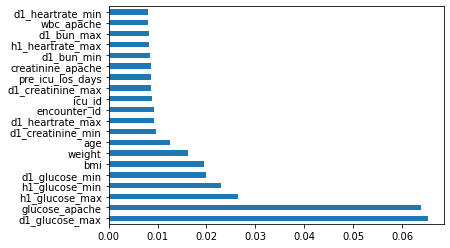

In [47]:
feat_importances = pd.Series(importance, index = x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Section 4: XGB Classifier

### 1\. Train an XGB Classifier on the diabetes data


In [48]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

xgb_clf.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)])

y_pred = xgb_clf.predict(x_test)

[0]	validation_0-auc:0.78386
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.792317
[2]	validation_0-auc:0.801893
[3]	validation_0-auc:0.803341
[4]	validation_0-auc:0.806504
[5]	validation_0-auc:0.806329
[6]	validation_0-auc:0.806959
[7]	validation_0-auc:0.811331
[8]	validation_0-auc:0.811761
[9]	validation_0-auc:0.811347
[10]	validation_0-auc:0.813614
[11]	validation_0-auc:0.814002
[12]	validation_0-auc:0.815348
[13]	validation_0-auc:0.815232
[14]	validation_0-auc:0.817263
[15]	validation_0-auc:0.817789
[16]	validation_0-auc:0.818549
[17]	validation_0-auc:0.819111
[18]	validation_0-auc:0.819619
[19]	validation_0-auc:0.819881
[20]	validation_0-auc:0.820497
[21]	validation_0-auc:0.820082
[22]	validation_0-auc:0.821279
[23]	validation_0-auc:0.822132
[24]	validation_0-auc:0.822713
[25]	validation_0-auc:0.823932
[26]	validation_0-auc:0.824917
[27]	validation_0-auc:0.82552
[28]	validation_0-auc:0.825803
[29]	validation_0-auc:0.827562
[30]	validation_0-a

### 2\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [49]:
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2511
           1       0.51      0.44      0.47       743

    accuracy                           0.78      3254
   macro avg       0.68      0.66      0.67      3254
weighted avg       0.77      0.78      0.77      3254



### 3\. Show the confusion matrix heatmap for the predictions

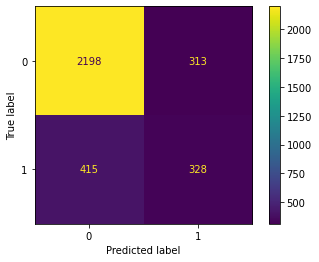

In [50]:
cm = (confusion_matrix(y_test, test_predict))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
